## Variation of parameters

In [1]:
from scipy.optimize import root
import numpy as np 
from matplotlib import pyplot as plt
from scipy.integrate import odeint 
import math
Δ=3.8*10**(-3.0)

In [2]:
def diff(X,K,F,Ω):
    x,y=X
    xdot = 0.5*(K*x +F)*(1+y*y-x*x) - K*x*y*y +Ω*y - x
    ydot = -0.5*(K*x*x*y + 2*F*x*y + K*y*y*y -K*y) -Ω*x -y
    return (xdot,ydot)

In [3]:
def zst(diff,K,F,Ω):
    sol = root(diff,x0=(1,0),args=(K,F,Ω),method='lm')
    zs = complex(sol.x[0],sol.x[1])
    #zs=fsolve(f, x0=complex(1-0j),fprime=derivative,args=(K,F,Ω))
    return zs

In [4]:
def eular(z0,h,K,F,Ω):
    x,y=np.real(z0),np.imag(z0)
    X=x,y
    xdot,ydot=diff(X,K,F,Ω)
    x_iter,y_iter=x + h*xdot, y + h*ydot
    return complex(x_iter, y_iter)

In [5]:
def zin(zst,p):
    zi=zst*np.exp(p*np.pi*(1j/12.0))
    return zi

In [6]:
dK=0.01
steps=int(((16-2)/dK)+1)
tk=np.zeros(shape=(steps,9))
F=3.5
Ω=1.4
h=0.001
t0=0.0
for i in range(0,steps) :
    K=2.0+(dK*i)
    tk[i,0]=K
    z1=zst(diff,K,F,Ω) 
    for k in range(1,9):
        t0=0.0
        p=-15.0+(3.0*k)
        if p!=0.0: 
            z0=zin(z1,p)
            while np.absolute(eular(z0,h,K,F,Ω)-z1)>=0.2:
                t0=t0+h
                z0=eular(z0,h,K,F,Ω)

        tk[i,k]=(t0/Δ)/24.0

(1.0, 24.0)

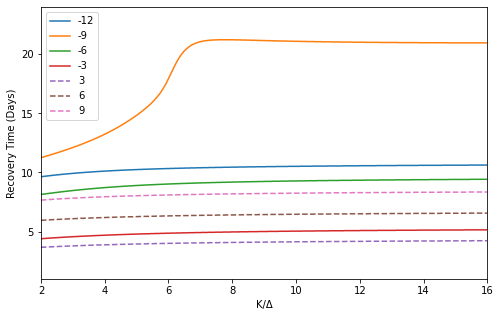

In [7]:
phase_differences=[-12,-9,-6,-3,3,6,9]
phase_differences_legend = [str(x) for x in phase_differences]
plt.figure(figsize=(8,5))
for i in range(1,9):
    if i!=5:
        if i<5:
            plt.plot(tk[:,0],tk[:,i])
        else:
            plt.plot(tk[:,0],tk[:,i],'--')
plt.ylabel('Recovery Time (Days)')
plt.xlabel('K/Δ')
plt.legend(phase_differences_legend)
plt.xlim(2,16)
plt.ylim(1,24)


In [8]:
dF=0.01
steps=int(((6-1.5)/dF)+1)
tf=np.zeros(shape=(steps,9))
K=4.5
Ω=1.4
h=0.01
t0=0.0
for i in range(0,steps) :
    F=1.5+(dF*i)
    tf[i,0]=F
    z1=zst(diff,K,F,Ω) 
    for k in range(1,9):
        t0=0.0
        p=-15.0+(3.0*k)
        if p!=0.0: 
            z0=zin(z1,p)
            while np.absolute(eular(z0,h,K,F,Ω)-z1)>=0.2:
                t0=t0+h
                z0=eular(z0,h,K,F,Ω)

        tf[i,k]=(t0/Δ)/24.0

(1.5, 6.0)

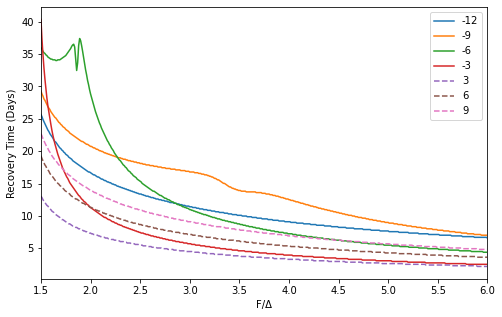

In [9]:
plt.figure(figsize=(8,5))
for i in range(1,9):
    if i!=5:
        if i<5:
            plt.plot(tf[:,0],tf[:,i])
        else:
            plt.plot(tf[:,0],tf[:,i],'--')
plt.ylabel('Recovery Time (Days)')
plt.xlabel('F/Δ')
plt.legend(phase_differences_legend)
plt.xlim(1.5,6)

In [10]:
dO=0.01
steps=int(((8)/dO)+1)
tO=np.zeros(shape=(steps,9))
K=4.5
F=3.5
h=0.001
t0=0.0
for i in range(0,steps) :
    Ω=-4.0+(dO*i)
    tO[i,0]=Ω
    z1=zst(diff,K,F,Ω) 
    for k in range(1,9):
        t0=0.0
        p=-15.0+(3.0*k)
        if p!=0.0: 
            z0=zin(z1,p)
            while np.absolute(eular(z0,h,K,F,Ω)-z1)>=0.2:
                t0=t0+h
                z0=eular(z0,h,K,F,Ω)

        tO[i,k]=(t0/Δ)/24.0

(-3.7, 3.7)

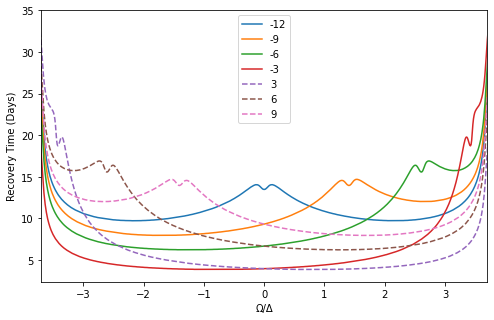

In [11]:
plt.figure(figsize=(8,5))
for i in range(1,9):
    if i!=5:
        if i<5:
            plt.plot(tO[:,0],tO[:,i])
        else:
            plt.plot(tO[:,0],tO[:,i],'--')
plt.ylabel('Recovery Time (Days)')
plt.xlabel('Ω/Δ')
plt.legend(phase_differences_legend)
plt.xlim(-3.7,3.7)
